<a href="https://colab.research.google.com/github/elena-andreini/TriesteItalyChapter_PlasticDebrisDetection/blob/main/task3-cleaning-and-preprocessing/MARIDA_and_Mados.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install rasterio folium geopandas shapely plotly kagglehub #necessary imports, some not present in colab

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 22.2/22.2 MB 11.8 MB/s eta 0:00:00


In [ ]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from tqdm.notebook import tqdm
import rasterio
from rasterio.plot import show
import folium
from folium.plugins import MarkerCluster
import geopandas as gpd
from shapely.geometry import Point
import glob
import cv2
from sklearn.preprocessing import StandardScaler
import plotly.express as px
import plotly.graph_objects as go
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
import kagglehub
import zipfile
import shutil
from datetime import datetime
import re

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
!ls /content/drive

MyDrive


###Mados Data

In [ ]:
import zipfile
import os

# Path to the ZIP file
zip_path ="/content/drive/MyDrive/MADOS.zip"

# Directory to extract the files
extract_path = "/content/mados_data"
os.makedirs(extract_path, exist_ok=True)

# Extract the ZIP file
with zipfile.ZipFile(zip_path, 'r') as zip_ref:
    zip_ref.extractall(extract_path)

print(f"Files extracted to: {extract_path}")

Files extracted to: /content/mados_data


In [ ]:
print("Dataset downloaded to:", extract_path)
print("Contents of the path:", os.listdir(extract_path))

Dataset downloaded to: /content/mados_data/MADOS
Contents of the path: ['Scene_7', 'Scene_171', 'Scene_133', 'Scene_98', 'Scene_60', 'Scene_27', 'Scene_93', 'Scene_14', 'Scene_26', 'Scene_73', 'Scene_6', 'Scene_75', 'Scene_126', 'Scene_68', 'Scene_148', 'Scene_156', 'Scene_79', 'Scene_123', 'Scene_70', 'Scene_28', 'Scene_44', 'Scene_49', 'Scene_164', 'Scene_92', 'Scene_114', 'Scene_40', 'splits', 'Scene_119', 'Scene_169', 'Scene_66', 'Scene_0', 'Scene_55', 'Scene_141', 'Scene_153', 'Scene_83', 'Scene_9', 'Scene_144', 'Scene_43', 'Scene_154', 'Scene_45', 'Scene_152', 'Scene_81', 'Scene_58', 'Scene_78', 'Scene_105', 'Scene_172', 'Scene_146', 'Scene_122', 'Scene_167', 'Scene_173', 'Scene_21', 'Scene_33', 'Scene_118', 'Scene_47', 'Scene_63', 'Scene_106', 'Scene_52', 'Scene_109', 'Scene_128', 'Scene_31', 'Scene_61', 'Scene_147', 'Scene_12', 'Scene_108', 'Scene_107', 'Scene_69', 'Scene_25', 'Scene_101', 'Scene_59', 'Scene_110', 'Scene_88', 'Scene_13', 'Scene_36', 'Scene_136', 'MADOS', 'Scene

In [ ]:
import os

def get_folder_size_gb(folder_path):
    total_size = 0
    for dirpath, dirnames, filenames in os.walk(folder_path):
        for filename in filenames:
            file_path = os.path.join(dirpath, filename)
            total_size += os.path.getsize(file_path)

    # Convert bytes to gigabytes (1 GB = 1024 * 1024 * 1024 bytes)
    size_gb = total_size / (1024 ** 3)
    return size_gb

# Example usage:
folder_path = '/content/mados_data'
size_gb = get_folder_size_gb(folder_path)
print(f"Size of folder '{folder_path}': {size_gb:.2f} GB")

Size of folder '/content/mados_data': 5.36 GB


In [ ]:
mados_path = "/content/mados_data/MADOS/splits"
print("Contents of MADOS directory:", os.listdir(mados_path))



Contents of MADOS directory: ['test_X.txt', 'train_X.txt', 'val_X.txt']


In [ ]:
import os

extract_path = "/content/mados_data"  # Replace with the actual path
print("Contents of the extracted directory:")
print(os.listdir(extract_path))

Contents of the extracted directory:
['MADOS']


Explor the data of scene 0

In [ ]:
import os

# Define the path to Scene_0
scene_0_path = "/content/mados_data/MADOS/Scene_0"

# Function to print the folder structure
def print_folder_structure(folder_path, indent=""):
    print(f"{indent}{os.path.basename(folder_path)}/")
    indent += "    "
    for item in os.listdir(folder_path):
        item_path = os.path.join(folder_path, item)
        if os.path.isdir(item_path):
            print_folder_structure(item_path, indent)
        else:
            print(f"{indent}{item}")

# Function to analyze file types and content
def analyze_files(folder_path):
    for root, dirs, files in os.walk(folder_path):
        for file in files:
            file_path = os.path.join(root, file)
            print(f"\nFile: {file_path}")
            if file.endswith("_conf_CROP.tif"):
                print("  Type: Confidence file")
                # Add logic to read and process _conf files if needed
            elif file.endswith("_rep_CROP.tif"):
                print("  Type: Report file")
                # Add logic to read and process _rep files if needed
            elif file.endswith("_cl_CROP.tif"):
                print("  Type: Class file")
                # Add logic to read and process _cl files if needed
            else:
                print("  Type: Other file")

# Print the folder structure
print("Folder Structure:")
print_folder_structure(scene_0_path)

# Analyze files in Scene_0
#print("\nAnalyzing Files:")
#analyze_files(scene_0_path)

Folder Structure:
Scene_0/
    10/
        Scene_0_L2R_rhorc_559_7.tif
        Scene_0_L2R_cl_5.tif
        Scene_0_L2R_cl_7.tif
        Scene_0_L2W_TUR_Nechad2016_665_2.tif
        Scene_0_L2R_rhorc_665_5.tif
        Scene_0_L2R_rhorc_833_5.tif
        Scene_0_L2R_rhorc_833_3.tif
        Scene_0_L2R_rgb_4.png
        Scene_0_L2R_rhorc_492_5.tif
        Scene_0_L2R_rhorc_559_4.tif
        Scene_0_L2R_rep_9.tif
        Scene_0_L2R_rhorc_559_9.tif
        Scene_0_L2R_rep_2.tif
        Scene_0_L2R_conf_4.tif
        Scene_0_L2W_TUR_Nechad2016_665_1.tif
        Scene_0_L2R_rhorc_492_8.tif
        Scene_0_L2R_conf_1.tif
        Scene_0_L2R_rgb_5.png
        Scene_0_L2R_rhorc_833_8.tif
        Scene_0_L2R_rhorc_665_4.tif
        Scene_0_L2R_rhorc_665_3.tif
        Scene_0_L2R_conf_2.tif
        Scene_0_L2R_rhorc_833_9.tif
        Scene_0_L2R_rep_4.tif
        Scene_0_L2R_rep_8.tif
        Scene_0_L2W_TUR_Nechad2016_665_4.tif
        Scene_0_L2R_rgb_1.png
        Scene_0_L2R_rhorc_559_1.tif
 

Scene and File Distribution:
Scene_7: {'10m': 320, '20m': 288, '60m': 32}
Scene_171: {'10m': 270, '20m': 243, '60m': 27}
Scene_133: {'10m': 30, '20m': 27, '60m': 3}
Scene_98: {'10m': 270, '20m': 243, '60m': 27}
Scene_60: {'10m': 20, '20m': 18, '60m': 2}
Scene_27: {'10m': 90, '20m': 81, '60m': 9}
Scene_93: {'10m': 60, '20m': 54, '60m': 6}
Scene_14: {'10m': 30, '20m': 27, '60m': 3}
Scene_26: {'10m': 90, '20m': 81, '60m': 9}
Scene_73: {'10m': 120, '20m': 108, '60m': 12}
Scene_6: {'10m': 390, '20m': 351, '60m': 39}
Scene_75: {'10m': 190, '20m': 171, '60m': 19}
Scene_126: {'10m': 30, '20m': 27, '60m': 3}
Scene_68: {'10m': 120, '20m': 108, '60m': 12}
Scene_148: {'10m': 80, '20m': 72, '60m': 8}
Scene_156: {'10m': 170, '20m': 153, '60m': 17}
Scene_79: {'10m': 90, '20m': 81, '60m': 9}
Scene_123: {'10m': 50, '20m': 45, '60m': 5}
Scene_70: {'10m': 120, '20m': 108, '60m': 12}
Scene_28: {'10m': 80, '20m': 72, '60m': 8}
Scene_44: {'10m': 40, '20m': 36, '60m': 4}
Scene_49: {'10m': 60, '20m': 54, '60m

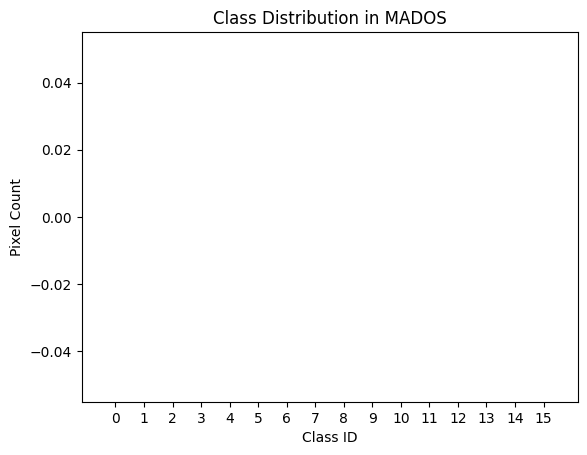

In [ ]:
import os
import rasterio
import numpy as np
import matplotlib.pyplot as plt

# Define dataset path
EXTRACT_PATH = "/content/mados_data/MADOS"  # Replace with the real path


# Count files in each resolution folder
scene_counts = {}
class_counts = {i: 0 for i in range(16)}  # 16 classes in MADOS

for scene in os.listdir(EXTRACT_PATH):
    scene_path = os.path.join(EXTRACT_PATH, scene)

    if not os.path.isdir(scene_path):  # Skip non-directory files
        continue

    scene_counts[scene] = {"10m": 0, "20m": 0, "60m": 0}

    for res in ["10", "20", "60"]:
        res_path = os.path.join(scene_path, res)
        if os.path.exists(res_path):
            files = os.listdir(res_path)
            scene_counts[scene][f"{res}m"] = len(files)

            # Check classification masks (_cl_CROP.tif)
            for file in files:
                if file.endswith("_cl_CROP.tif"):
                    with rasterio.open(os.path.join(res_path, file)) as cl_mask:
                        mask_data = cl_mask.read(1)
                        unique, counts = np.unique(mask_data, return_counts=True)
                        for u, c in zip(unique, counts):
                            class_counts[u] += c  # Count pixels per class

# Print scene distribution
print("Scene and File Distribution:")
for scene, counts in scene_counts.items():
    print(f"{scene}: {counts}")

# Print class distribution
print("\nClass Distribution (Pixel Counts):")
for class_id, count in class_counts.items():
    print(f"Class {class_id}: {count} pixels")

# Plot class distribution
plt.bar(class_counts.keys(), class_counts.values(), color='skyblue')
plt.xlabel("Class ID")
plt.ylabel("Pixel Count")
plt.title("Class Distribution in MADOS")
plt.xticks(range(16))
plt.show()


In [ ]:
# Set up the environment
import warnings
warnings.filterwarnings('ignore')

Download Marida DataBase

In [ ]:
#import shutil

#dataset_path = "/content/mados_data"  # Adjust if needed

#if os.path.exists("/content/mados_data"):
    #shutil.rmtree("/content/mados_data")
    ##print("MADOS dataset deleted successfully.")
#else:
    #print("Dataset not found, nothing to delete.")


MADOS dataset deleted successfully.


In [ ]:
import zipfile
import os

# Path to the ZIP file
zip_path1 ="/content/drive/MyDrive/MARIDA.zip"

# Directory to extract the files
extract_path1 = "/content/marida_data"
os.makedirs(extract_path, exist_ok=True)

# Extract the ZIP file
with zipfile.ZipFile(zip_path1, 'r') as zip_ref:
    zip_ref.extractall(extract_path1)

print(f"Files extracted to: {extract_path1}")

Files extracted to: /content/marida_data


In [ ]:
print("Dataset downloaded to:", extract_path1)
print("Contents of the path:", os.listdir(extract_path1))


Dataset downloaded to: /content/marida_data
Contents of the path: ['labels_mapping.txt', 'splits', 'patches', 'shapefiles']


In [ ]:
!ls -lh /content/mados_data/MADOS/Scene_101/10/Scene_101_L2R_conf_2.tif

-rw-r--r-- 1 root root 65K Mar 25 08:54 /content/mados_data/MADOS/Scene_101/10/Scene_101_L2R_conf_2.tif


Metadata: {'driver': 'GTiff', 'dtype': 'uint8', 'nodata': None, 'width': 240, 'height': 240, 'count': 1, 'crs': CRS.from_wkt('GEOGCS["WGS 84",DATUM["WGS_1984",SPHEROID["WGS 84",6378137,298.257223563,AUTHORITY["EPSG","7030"]],AUTHORITY["EPSG","6326"]],PRIMEM["Greenwich",0,AUTHORITY["EPSG","8901"]],UNIT["degree",0.0174532925199433,AUTHORITY["EPSG","9122"]],AXIS["Latitude",NORTH],AXIS["Longitude",EAST],AUTHORITY["EPSG","4326"]]'), 'transform': Affine(1.0, 0.0, 0.0,
       0.0, 1.0, 0.0)}
Unique values: [0 3]
Min/Max: 0 3


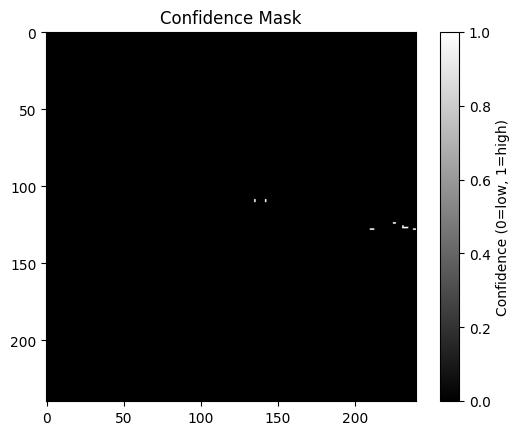

In [ ]:
import rasterio
import numpy as np
import matplotlib.pyplot as plt

# Open the file
file_path = "/content/mados_data/MADOS/Scene_101/10/Scene_101_L2R_conf_3.tif"
with rasterio.open(file_path) as src:
    conf_data = src.read(1)  # Read the first band
    print("Metadata:", src.meta)  # Check dtype, shape, etc.
    print("Unique values:", np.unique(conf_data))
    print("Min/Max:", np.min(conf_data), np.max(conf_data))

    # Visualize
    plt.imshow(conf_data, cmap='gray', vmin=0, vmax=1)
    plt.colorbar(label='Confidence (0=low, 1=high)')
    plt.title("Confidence Mask")
    plt.show()

In [ ]:
import rasterio
import numpy as np
from matplotlib import pyplot as plt

# Open the classification label file
cl_file = "/content/mados_data/MADOS/Scene_101/10/Scene_101_L2R_cl_6.tif"
with rasterio.open(cl_file) as src:
    cl_data = src.read(1)
    print("Label metadata:", src.meta)
    print("Unique label values:", np.unique(cl_data))

Label metadata: {'driver': 'GTiff', 'dtype': 'uint8', 'nodata': None, 'width': 240, 'height': 240, 'count': 1, 'crs': CRS.from_wkt('GEOGCS["WGS 84",DATUM["WGS_1984",SPHEROID["WGS 84",6378137,298.257223563,AUTHORITY["EPSG","7030"]],AUTHORITY["EPSG","6326"]],PRIMEM["Greenwich",0,AUTHORITY["EPSG","8901"]],UNIT["degree",0.0174532925199433,AUTHORITY["EPSG","9122"]],AXIS["Latitude",NORTH],AXIS["Longitude",EAST],AUTHORITY["EPSG","4326"]]'), 'transform': Affine(1.0, 0.0, 0.0,
       0.0, 1.0, 0.0)}
Unique label values: [0 7]


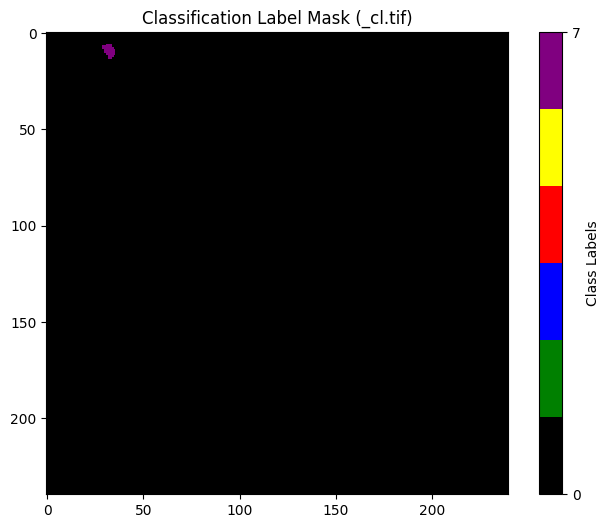

In [ ]:
# Create a color map for visualization (adjust colors to match your classes)
from matplotlib.colors import ListedColormap
class_colors = ['black', 'green', 'blue', 'red', 'yellow', 'purple']  # Example for 6 classes
cmap = ListedColormap(class_colors)

plt.figure(figsize=(8, 6))
plt.imshow(cl_data, cmap=cmap, interpolation='none')
plt.colorbar(ticks=np.unique(cl_data), label='Class Labels')
plt.title("Classification Label Mask (_cl.tif)")
plt.show()

In [ ]:
import rasterio
conf_data = rasterio.open("/content/mados_data/MADOS/Scene_101/10/Scene_101_L2R_rep_1.tif").read(1)  # Reads the first band
print(conf_data[10, 20])  # Prints confidence at pixel (10, 20), e.g., `0.7`

0


In [ ]:
import os

# Define dataset base directory
base_dir = "/root/.cache/kagglehub/datasets/anangfath/marida-marine-debrish-dataset/versions/1"

# Define important subdirectories
patches_dir = os.path.join(base_dir, "patches")
splits_dir = os.path.join(base_dir, "splits")
labels_file = os.path.join(base_dir, "labels_mapping.txt")

# Check dataset structure
print("Dataset Structure:")
print(f"Patches Directory: {os.listdir(patches_dir)[:5]}" if os.path.exists(patches_dir) else "Patches Directory Not Found")
print(f"Splits Directory: {os.listdir(splits_dir) if os.path.exists(splits_dir) else 'Splits Directory Not Found'}")
print(f"Labels Mapping File: {'Found' if os.path.exists(labels_file) else 'Not Found'}")


Dataset Structure:
Patches Directory Not Found
Splits Directory: Splits Directory Not Found
Labels Mapping File: Not Found


In [ ]:
modos_class_mapping = {
    1: 'Marine Debris',
    2: 'Dense Sargassum',
    3: 'Sparse Sargassum',
    4: 'Natural Organic Material',
    5: 'Ship',
    6: 'Clouds',
    7: 'Marine Water',
    8: 'Sediment-Laden Water',
    9: 'Foam',
    10: 'Turbid Water',
    11: 'Shallow Water',
    12: 'Waves',
    13: 'Cloud Shadows',
    14: 'Wakes',
    15: 'Mixed Water'
}

In [ ]:
# Define color mapping for visualization (used Deep seek for this)
modos_color_mapping = {
    1: (255, 0, 0),      # Marine Debris - Red
    2: (0, 128, 0),      # Dense Sargassum - Green
    3: (144, 238, 144),  # Sparse Sargassum - Light Green
    4: (139, 69, 19),    # Natural Organic Material - Brown
    5: (128, 128, 128),  # Ship - Gray
    6: (255, 255, 255),  # Clouds - White
    7: (0, 0, 255),      # Marine Water - Blue
    8: (210, 180, 140),  # Sediment-Laden Water - Tan
    9: (255, 255, 224),  # Foam - Light Yellow
    10: (64, 224, 208),  # Turbid Water - Turquoise
    11: (176, 224, 230), # Shallow Water - Powder Blue
    12: (0, 191, 255),   # Waves - Deep Sky Blue
    13: (105, 105, 105), # Cloud Shadows - Dim Gray
    14: (220, 220, 220), # Wakes - Gainsboro
    15: (70, 130, 180)   # Mixed Water - Steel Blue
}

In [ ]:
marida_class_mapping = {
    1: 'Plastic Debris',
    2: 'Floating Objects',
    3: 'Algae',
    4: 'Natural Organic Material',
    5: 'Ships',
    6: 'Clouds',
    7: 'Water',
    8: 'Sediment',
    9: 'Foam',
    10: 'Turbid Water',
    11: 'Shallow Water',
    12: 'Waves',
    13: 'Cloud Shadows',
    14: 'Wakes',
    15: 'Mixed Water'
}

In [ ]:
marida_color_mapping = {
    1: (255, 0, 0),       # Plastic Debris - Red
    2: (255, 165, 0),     # Floating Objects - Orange
    3: (0, 128, 0),       # Algae - Green
    4: (139, 69, 19),     # Natural Organic Material - Brown
    5: (128, 128, 128),   # Ships - Gray
    6: (255, 255, 255),   # Clouds - White
    7: (0, 0, 255),       # Water - Blue
    8: (210, 180, 140),   # Sediment - Tan
    9: (255, 255, 224),   # Foam - Light Yellow
    10: (64, 224, 208),   # Turbid Water - Turquoise
    11: (173, 216, 230),  # Shallow Water - Light Blue
    12: (0, 191, 255),    # Waves - Deep Sky Blue
    13: (105, 105, 105),  # Cloud Shadows - Dim Gray
    14: (220, 220, 220),  # Wakes - Gainsboro
    15: (70, 130, 180)    # Mixed Water - Steel Blue
}

In [ ]:
# Create a mapping between MARIDA and MADOS classes
common_class_mapping = {}

# Compare classes and create a common mapping
for marida_id, marida_class in marida_class_mapping.items():
    for mados_id, mados_class in modos_class_mapping.items():
        if marida_class.lower() == mados_class.lower():
            common_class_mapping[marida_id] = mados_id
            break

# Print the common class mapping
print("Common Class Mapping:")
for marida_id, mados_id in common_class_mapping.items():
    print(f"MARIDA Class {marida_id}: {marida_class_mapping[marida_id]} -> MADOS Class {mados_id}: {modos_class_mapping[mados_id]}")

# Handle mismatched classes
marida_unique_classes = set(marida_class_mapping.values()) - set(modos_class_mapping.values())
modos_unique_classes = set(modos_class_mapping.values()) - set(marida_class_mapping.values())

print("\nMARIDA Unique Classes:")
for cls in marida_unique_classes:
    print(f"- {cls}")

print("\nMADOS Unique Classes:")
for cls in modos_unique_classes:
    print(f"- {cls}")

# Example: Merge datasets based on common classes
def merge_datasets(marida_data, mados_data, common_class_mapping):
    merged_data = []

    # Add MARIDA data
    for marida_sample in marida_data:
        marida_class_id = marida_sample['class']
        if marida_class_id in common_class_mapping:
            merged_data.append({
                'image': marida_sample['image'],
                'class': common_class_mapping[marida_class_id],  # Use mapped MADOS class ID
                'source': 'MARIDA'
            })

    # Add MADOS data
    for mados_sample in mados_data:
        mados_class_id = mados_sample['class']
        # Check if this MADOS class ID is in the values of our mapping
        if mados_class_id in common_class_mapping.values():
            merged_data.append({
                'image': mados_sample['image'],
                'class': mados_class_id,
                'source': 'MADOS'
            })

    return merged_data

Common Class Mapping:
MARIDA Class 4: Natural Organic Material -> MADOS Class 4: Natural Organic Material
MARIDA Class 6: Clouds -> MADOS Class 6: Clouds
MARIDA Class 9: Foam -> MADOS Class 9: Foam
MARIDA Class 10: Turbid Water -> MADOS Class 10: Turbid Water
MARIDA Class 11: Shallow Water -> MADOS Class 11: Shallow Water
MARIDA Class 12: Waves -> MADOS Class 12: Waves
MARIDA Class 13: Cloud Shadows -> MADOS Class 13: Cloud Shadows
MARIDA Class 14: Wakes -> MADOS Class 14: Wakes
MARIDA Class 15: Mixed Water -> MADOS Class 15: Mixed Water

MARIDA Unique Classes:
- Sediment
- Algae
- Floating Objects
- Water
- Plastic Debris
- Ships

MADOS Unique Classes:
- Marine Water
- Sparse Sargassum
- Sediment-Laden Water
- Dense Sargassum
- Marine Debris
- Ship


In [ ]:
import os
from pathlib import Path
import shutil
from tqdm import tqdm

# Base directory
base_dir = Path("/content/mados_data/MADOS")
output_dir = Path("/content/extracted_data")

# Create main output subfolders
(output_dir / "images").mkdir(parents=True, exist_ok=True)
(output_dir / "conf").mkdir(parents=True, exist_ok=True)
(output_dir / "cl").mkdir(parents=True, exist_ok=True)

def process_scene(scene_path):
    """Copy files to organized subfolders without renaming"""
    for file_path in scene_path.glob("*"):
        # Handle both .png and .tif RGB files
        if "_rgb_" in file_path.name.lower() and file_path.suffix.lower() in ('.png', '.tif'):
            shutil.copy2(file_path, output_dir / "images" / file_path.name)
        elif "_conf_" in file_path.name.lower() and file_path.suffix.lower() == '.tif':
            shutil.copy2(file_path, output_dir / "conf" / file_path.name)
        elif "_cl_" in file_path.name.lower() and file_path.suffix.lower() == '.tif':
            shutil.copy2(file_path, output_dir / "cl" / file_path.name)

# Process all scenes from 0 to 173
for scene_num in tqdm(range(174), desc="Processing Scenes"):
    scene_path = base_dir / f"Scene_{scene_num}"

    if scene_path.exists():
        # Process each subdirectory (10, 20, etc.) within the scene
        for subdir in scene_path.glob("*/"):
            if subdir.is_dir():
                process_scene(subdir)
    else:
        print(f"Scene {scene_num} not found, skipping...")

print("\nExtraction complete!")
print(f"Files organized in:\n{output_dir}/")
print("├── images/  (All *_rgb_*.png and *_rgb_*.tif files)")
print("├── conf/    (All *_conf_*.tif files)")
print("└── cl/      (All *_cl_*.tif files)")

Processing Scenes: 100%|██████████| 174/174 [00:20<00:00,  8.53it/s]


Extraction complete!
Files organized in:
/content/extracted_data/
├── images/  (All *_rgb_*.png and *_rgb_*.tif files)
├── conf/    (All *_conf_*.tif files)
└── cl/      (All *_cl_*.tif files)


spectral analysis

Starting analysis...


Analyzing class distribution: 100%|██████████| 50/50 [00:00<00:00, 238.69it/s]



Class distribution (based on 50 samples):
  7: Marine Water - 0.37%
  6: Oil Spill - 0.24%
  11: Shallow Water - 0.04%
  10: Turbid Water - 0.03%
  12: Waves & Wakes - 0.02%
  1: Marine Debris - 0.02%
  15: Sea snot - 0.02%
  3: Sparse Floating Algae - 0.01%
  5: Ship - 0.01%
  13: Oil Platform - 0.00%
  4: Natural Organic Material - 0.00%
  9: Foam - 0.00%
  2: Dense Sargassum - 0.00%
  8: Sediment-Laden Water - 0.00%
  14: Jellyfish - 0.00%


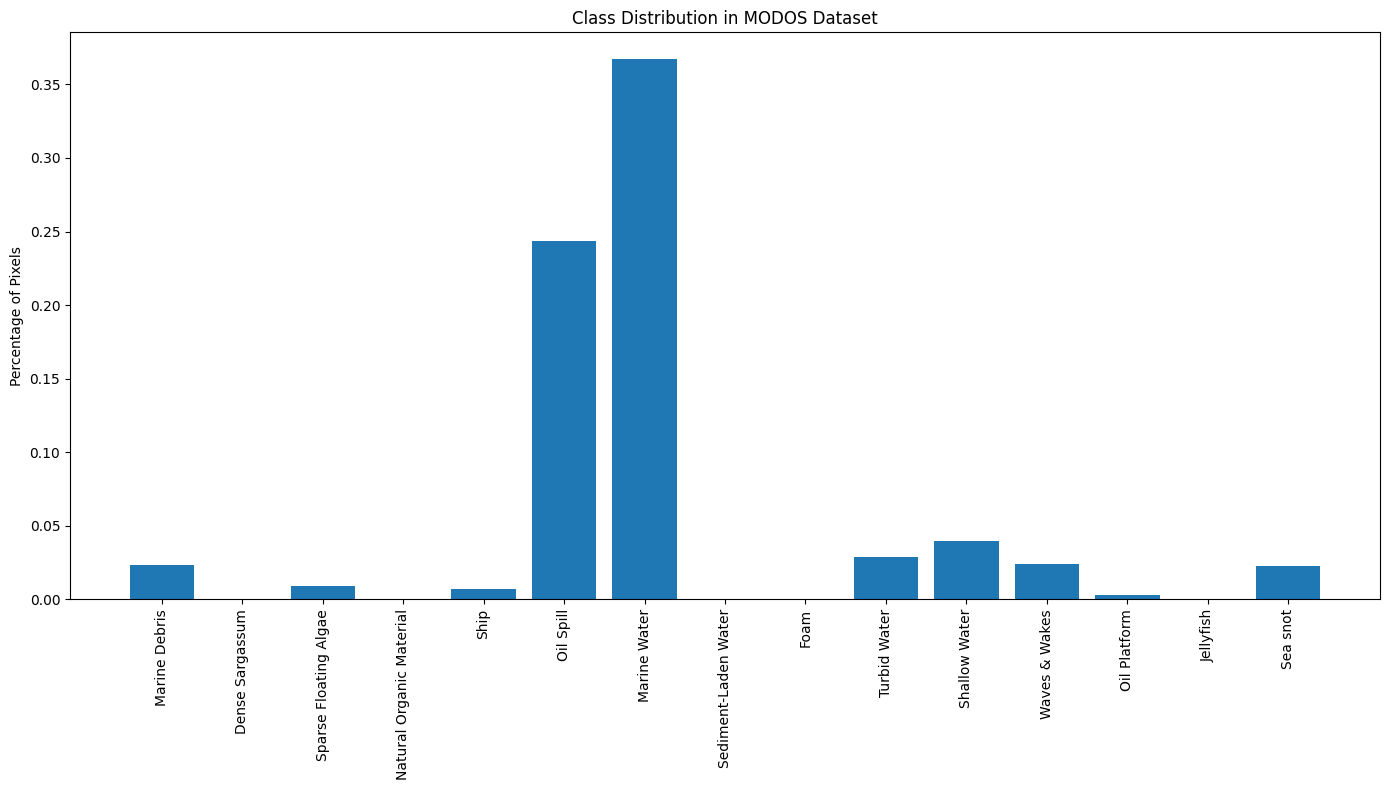


Debris vs. Non-debris:
  Marine Debris: 0.02%
  Non-debris: 0.74%


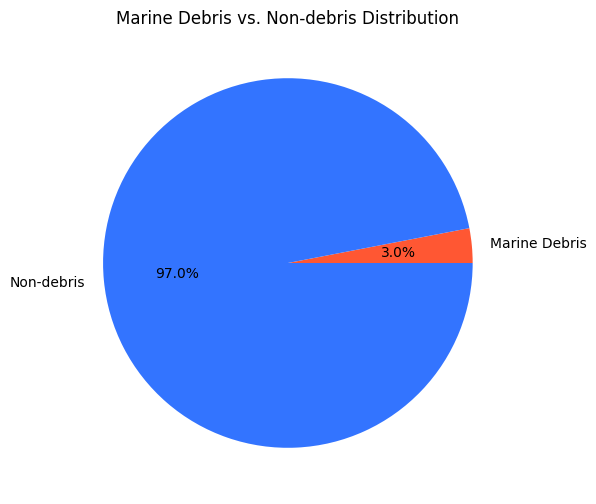

Analyzing spectral signatures: 100%|██████████| 20/20 [00:00<00:00, 5173.04it/s]


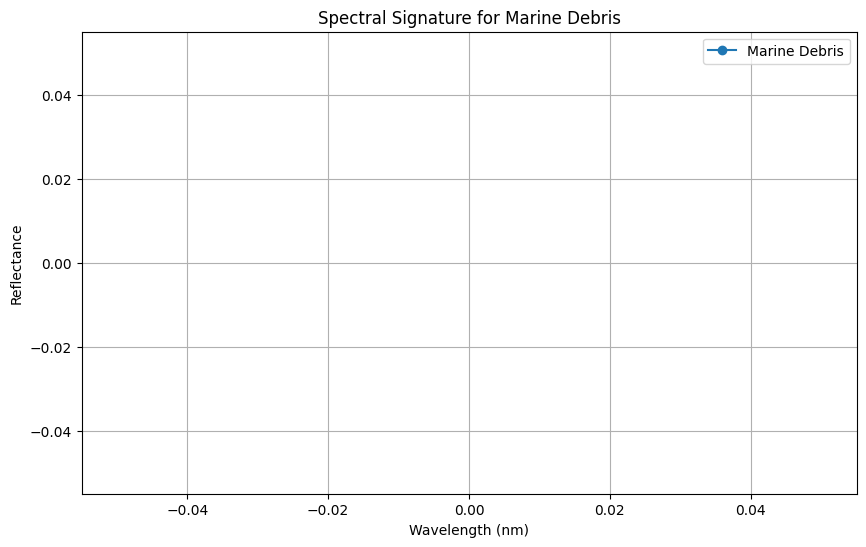

In [ ]:
import os
import numpy as np
import rasterio
from tqdm import tqdm
import matplotlib.pyplot as plt
from pathlib import Path
import random

# Define paths and class mapping
base_dir = Path("/content/extracted_data")
class_mapping = {
    1: 'Marine Debris',
    2: 'Dense Sargassum',
    3: 'Sparse Floating Algae',
    4: 'Natural Organic Material',
    5: 'Ship',
    6: 'Oil Spill',
    7: 'Marine Water',
    8: 'Sediment-Laden Water',
    9: 'Foam',
    10: 'Turbid Water',
    11: 'Shallow Water',
    12: 'Waves & Wakes',
    13: 'Oil Platform',
    14: 'Jellyfish',
    15: 'Sea snot'
}

def analyze_class_distribution(sample_size=50):
    """Analyze the distribution of classes in the MODOS dataset"""
    # Get list of all classification files
    cl_files = list((base_dir / "cl").glob("*.tif"))

    # Randomly sample files for analysis
    if len(cl_files) > sample_size:
        cl_files_sample = random.sample(cl_files, sample_size)
    else:
        cl_files_sample = cl_files

    # Initialize class counts
    class_counts = {i: 0 for i in range(1, 16)}
    total_pixels = 0

    for cl_file in tqdm(cl_files_sample, desc="Analyzing class distribution"):
        with rasterio.open(cl_file) as src:
            mask_data = src.read(1)

            # Count class pixels
            for class_id in range(1, 16):
                class_counts[class_id] += np.sum(mask_data == class_id)

            total_pixels += mask_data.size

    # Calculate percentages
    class_percentages = {class_id: count / total_pixels * 100
                        for class_id, count in class_counts.items()}

    # Print results
    print(f"\nClass distribution (based on {len(cl_files_sample)} samples):")
    for class_id, percentage in sorted(class_percentages.items(),
                                     key=lambda x: x[1], reverse=True):
        print(f"  {class_id}: {class_mapping[class_id]} - {percentage:.2f}%")

    # Plot class distribution
    plt.figure(figsize=(14, 8))
    plt.bar(
        [class_mapping[i] for i in range(1, 16)],
        [class_percentages[i] for i in range(1, 16)]
    )
    plt.xticks(rotation=90)
    plt.ylabel("Percentage of Pixels")
    plt.title("Class Distribution in MODOS Dataset")
    plt.tight_layout()
    plt.savefig(base_dir / "class_distribution.png")
    plt.show()

    # Calculate debris vs non-debris
    debris_percentage = class_percentages[1]
    non_debris_percentage = sum([p for i, p in class_percentages.items() if i != 1])

    print(f"\nDebris vs. Non-debris:")
    print(f"  Marine Debris: {debris_percentage:.2f}%")
    print(f"  Non-debris: {non_debris_percentage:.2f}%")

    # Plot debris vs non-debris
    plt.figure(figsize=(10, 6))
    plt.pie([debris_percentage, non_debris_percentage],
            labels=['Marine Debris', 'Non-debris'],
            autopct='%1.1f%%',
            colors=['#FF5733', '#3374FF'])
    plt.title("Marine Debris vs. Non-debris Distribution")
    plt.savefig(base_dir / "debris_vs_non_debris.png")
    plt.show()

    return class_percentages

def spectral_analysis(class_id=1, sample_size=20):
    """Perform spectral analysis for a specific class"""
    # Get corresponding RGB and classification files
    cl_files = list((base_dir / "cl").glob("*.tif"))
    rgb_files = [base_dir / "images" / f.name.replace("_cl_", "_rgb_").replace(".tif", ".png")
                for f in cl_files]

    # Find files containing the target class
    target_files = []
    for cl_file in tqdm(cl_files, desc="Finding target class samples"):
        with rasterio.open(cl_file) as src:
            data = src.read(1)
            if np.any(data == class_id):
                target_files.append(cl_file)
                if len(target_files) >= sample_size:
                    break

    if not target_files:
        print(f"No samples found for class {class_id}")
        return

    # Initialize spectral stats
    band_stats = {
        '492': {'mean': [], 'std': []},
        '559': {'mean': [], 'std': []},
        '665': {'mean': [], 'std': []},
        '833': {'mean': [], 'std': []}
    }

    # Analyze spectral signatures
    for cl_file in tqdm(target_files, desc="Analyzing spectral signatures"):
        scene_id = cl_file.name.split('_')[1]
        tile_id = cl_file.stem.split('_')[-1]

        # Get corresponding reflectance files
        for band in band_stats.keys():
            band_file = base_dir / "images" / f"Scene_{scene_id}_L2R_rhorc_{band}_{tile_id}.tif"
            if band_file.exists():
                with rasterio.open(band_file) as src:
                    band_data = src.read(1)
                    mask = (cl_data == class_id)
                    if np.any(mask):
                        band_stats[band]['mean'].append(np.mean(band_data[mask]))
                        band_stats[band]['std'].append(np.std(band_data[mask]))

    # Calculate average spectral signature
    spectral_profile = {
        band: {
            'mean': np.mean(stats['mean']),
            'std': np.mean(stats['std'])
        }
        for band, stats in band_stats.items()
    }

    # Plot spectral signature
    plt.figure(figsize=(10, 6))
    wavelengths = [492, 559, 665, 833]
    means = [spectral_profile[str(b)]['mean'] for b in wavelengths]
    stds = [spectral_profile[str(b)]['std'] for b in wavelengths]

    plt.plot(wavelengths, means, 'o-', label=class_mapping[class_id])
    plt.fill_between(wavelengths,
                    np.array(means)-np.array(stds),
                    np.array(means)+np.array(stds),
                    alpha=0.2)

    plt.xlabel("Wavelength (nm)")
    plt.ylabel("Reflectance")
    plt.title(f"Spectral Signature for {class_mapping[class_id]}")
    plt.legend()
    plt.grid(True)
    plt.savefig(base_dir / f"spectral_signature_class_{class_id}.png")
    plt.show()

    return spectral_profile

# Run analyses
print("Starting analysis...")
class_dist = analyze_class_distribution()
debris_spectrum = spectral_analysis(class_id=1)  # Marine Debris